In [1]:
import numpy as np
from numpy import linalg as lg
from matplotlib import pyplot as plt

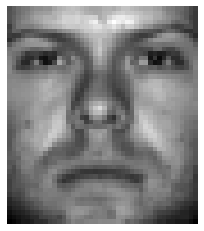

In [2]:
yalefaces = np.loadtxt("yalefaces.csv", delimiter=',')
plt.imshow(yalefaces[:, 0].reshape((48, 42)), cmap='gray')
plt.axis('off')
plt.show()

In [3]:
yalemeans = yalefaces.mean(axis=1)[:, None]
yalefaces = yalefaces - yalemeans

s, v = lg.eig(yalefaces @ yalefaces.T)
# eigenvalues/eigenvectors of sample covariance matrix
s, v = np.real(s), np.real(v)
# X.T @ X has only real eigenvectors but estimation error occurs
inds = np.argsort(s)[::-1]
s, v = s[inds], v[:, inds]
# sort eigenvalues
z = v.T @ yalefaces
# projection onto eigenspace

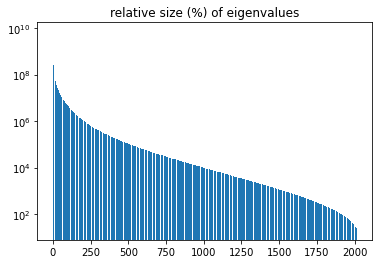

In [4]:
rel_s = s / s.sum()
plt.bar(np.arange(s.size), rel_s)
plt.yscale('log')
plt.title("relative size (%) of eigenvalues")
plt.show()

95% of data retained after 42 principal components
99% of data retained after 166 principal components


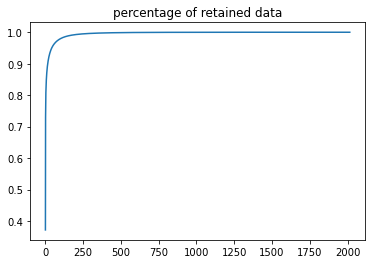

In [5]:
sum_rel_s = rel_s.cumsum()
print(f"95% of data retained after {np.argmax(sum_rel_s > 0.95)} principal components")
print(f"99% of data retained after {np.argmax(sum_rel_s > 0.99)} principal components")
plt.plot(np.arange(s.size), sum_rel_s)
plt.title("percentage of retained data")
plt.show()

<ipython-input-6-0dbad1b42a93>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


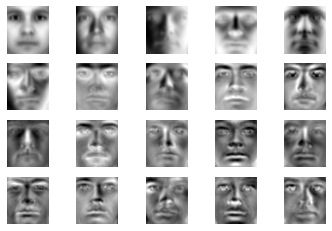

In [6]:
fig, ax = plt.subplots(4, 5)
inds = np.array(np.meshgrid(np.arange(4), np.arange(5))).T.reshape(-1, 2)
i, j = 0, 0
_v = np.hstack([yalemeans, v])
for ind in range(inds.shape[0]):
    i, j = inds[ind][0], inds[ind][1]
    ax[i, j].imshow(_v[:, ind].reshape((48, 42)), cmap='gray')
    ax[i, j].axis('off')
fig.show()

The first image is the average of all faces. Images 3, 4, 6, 12 show principal components of different lighting angles - right, bottom, left, top respectively. Image 8 shows the faces at a slight upwards angle, where the mouth/nose is more pronounced. 

<ipython-input-7-6d5134624e72>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


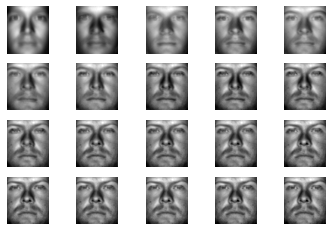

In [7]:
fig, ax = plt.subplots(4, 5)
for ind in range(inds.shape[0]):
    i, j = inds[ind][0], inds[ind][1]
    k = (ind + 1) * 5
    ax[i, j].imshow((v[:, :k] @ z[:k, 0]).reshape((48, 42)), cmap='gray')
    ax[i, j].axis('off')
fig.show()

The figure shows the first face under various amounts of compression, using 5, 10, 15, ... , 95, 100 dimensions from PCA. 